در این بخش به دنبال یادگیری این مورد هستیم که کدارم یک از توزیع های احتمالی را میتوانیم برای داده های خودمون استفاده کنیم

In this section, we are looking to learn which one of the possible distributions we can use for our own data.

پارامترهای اون توزیع رو از توی دیتاهامون استخراج کنیم و بر اساس اون پارامترها یک توزیع ایده آل بسازیم و دیتای خودمون رو با اون توزیع ایده آل مقایسه کنیم.
و ببینیم آیا دیتای ما با اون توزیع ایده آل شبیه به هم هستند یا نه اگر شبیه به هم بودند یعنی دیتای ما از اون توزیع پیروی میکند وگرنه پیروی نمیکند.

##### میانگین = loc 
##### استاندارد = scale
توزیع نرمال دو پارامتر دارد یکی `میانگین` و دیگری انحراف `استاندارد`

##### ابتدا = loc
##### انتها = scale
توزیع یونیفرم یک پارامتر `ابتدا` و یک پارامتر `انتها`

##### احتمال موفقیت = n 
توزیع برنولی فقط یک پارامتر دارد که پارامتر `احتمال موفقیت` هست

##### تعداد تکرار = n
##### احتمال موفقیت = p
توزیع باینومیال دو پارامتر دارد یکی `تعداد تکرار` و دیگری `احتمال موفقیت `

##### لامبدا = lam
##### تعداد تکرار = size 
توزیع پوآسون یک پارامتر دارد به اسم `لامبدا` و البته `تعداد تکرار `

##### اسکیل = scale
##### تعداد تکرار = size
توزیع اکپوننشیال که همانند پوآسون دو پارامتر دارد که `اسکیل` برعکس لامبدا کار میکند و دیگری هم `تعداد تکرار` است

In [50]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
#https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
def kl(p, q):
    # https://numpy.org/doc/stable/reference/generated/numpy.where.html
    res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return res

In [15]:
x = np.arange(-10, 10, 0.001)
print(len(x))
x

20000


array([-10.   ,  -9.999,  -9.998, ...,   9.997,   9.998,   9.999])

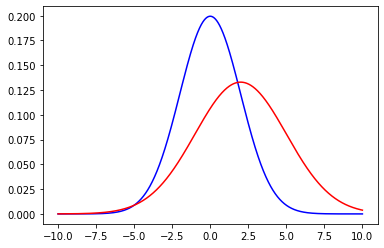

In [16]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
p = norm.pdf(x, 0, 2) # loc= 0 میانگین, scale = 2 انحراف استاندارد
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [17]:
kl(p, q) #هر چه بیشتر شبیه به هم باشند عدد به سمت صفر میرود

349.91348337868124

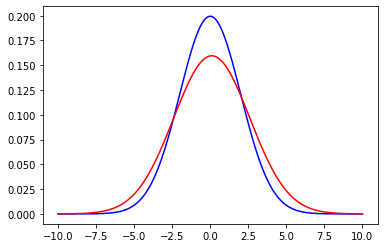

In [18]:
p = norm.pdf(x, 0, 2) # loc= 0 میانگین, scale = 2 انحراف استاندارد
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [19]:
kl(p, q) 

43.94620233653506

In [21]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<AxesSubplot:>

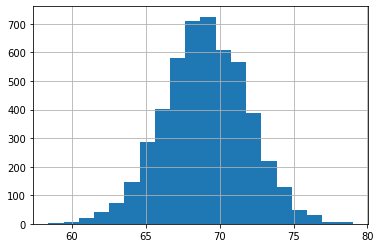

In [26]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=20)

In [27]:
males.describe()

count    5000.000000
mean       69.026346
std         2.863362
min        58.406905
25%        67.174679
50%        69.027709
75%        70.988744
max        78.998742
Name: Height, dtype: float64

In [30]:
males.describe()['mean']

69.02634590621741

In [31]:
males.describe()['std']

2.863362228660647

In [37]:
count, devision = np.histogram(males, bins=100)
print('counter:\n ', count)
print('devision:\n ', devision)

counter:
  [  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
devision:
  [58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014

In [38]:
idealData = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
print(idealData)

[67.88542479 70.00571406 64.08221615 ... 72.11484725 68.169533
 74.55517413]


In [39]:
iCount, iDevision = np.histogram(idealData, bins=100)
print(iCount)
print(iDevision)

[  2   0   0   0   0   0   0   0   2   1   1   1   1   6   7  11   8   6
   9   7  14  17  25  18  28  20  25  40  44  58  54  49  58  69  90  86
  83 105 117 109 115 133 132 144 141 140 141 160 134 132 131 182 147 163
 129 127 131 139 122 122 103  96 103  77  90  63  76  65  50  42  42  46
  28  38  26  17   6  17  13  12  13   7   5   6   5   2   5   1   2   1
   0   3   1   1   0   0   0   1   0   1]
[58.12941894 58.34983128 58.57024362 58.79065595 59.01106829 59.23148063
 59.45189297 59.6723053  59.89271764 60.11312998 60.33354231 60.55395465
 60.77436699 60.99477932 61.21519166 61.435604   61.65601634 61.87642867
 62.09684101 62.31725335 62.53766568 62.75807802 62.97849036 63.19890269
 63.41931503 63.63972737 63.8601397  64.08055204 64.30096438 64.52137672
 64.74178905 64.96220139 65.18261373 65.40302606 65.6234384  65.84385074
 66.06426307 66.28467541 66.50508775 66.72550008 66.94591242 67.16632476
 67.3867371  67.60714943 67.82756177 68.04797411 68.26838644 68.48879878
 68.70921

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   1.,
          1.,   1.,   6.,   7.,  11.,   8.,   6.,   9.,   7.,  14.,  17.,
         25.,  18.,  28.,  20.,  25.,  40.,  44.,  58.,  54.,  49.,  58.,
         69.,  90.,  86.,  83., 105., 117., 109., 115., 133., 132., 144.,
        141., 140., 141., 160., 134., 132., 131., 182., 147., 163., 129.,
        127., 131., 139., 122., 122., 103.,  96., 103.,  77.,  90.,  63.,
         76.,  65.,  50.,  42.,  42.,  46.,  28.,  38.,  26.,  17.,   6.,
         17.,  13.,  12.,  13.,   7.,   5.,   6.,   5.,   2.,   5.,   1.,
          2.,   1.,   0.,   3.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([58.12941894, 58.34983128, 58.57024362, 58.79065595, 59.01106829,
        59.23148063, 59.45189297, 59.6723053 , 59.89271764, 60.11312998,
        60.33354231, 60.55395465, 60.77436699, 60.99477932, 61.21519166,
        61.435604  , 61.65601634, 61.87642867, 62.09684101, 62.31725335,
        62.53766568, 62.75

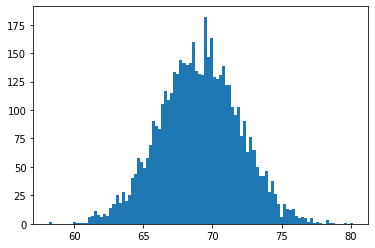

In [43]:
plt.hist(idealData, bins=100)

In [44]:
kl(count, iCount)

/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: divide by zero encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: invalid value encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: divide by zero encountered in log
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: invalid value encountered in multiply
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


173.10137930369442

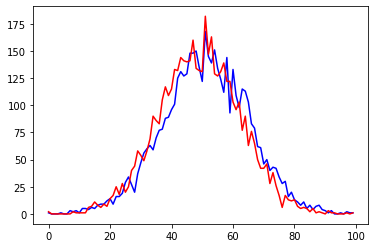

In [45]:
plt.plot(count, c='blue')
plt.plot(iCount, c='red')

In [46]:
np.sum(count)

5000

In [47]:
# برای به دست آوردن احتمال
# البته برای بدست آوردن توزیع نرمال ایده آل بایستی تقسیم بر بالاترین مقدار بشه که در این مثال 160 هست
count / 5000

array([0.0002, 0.    , 0.    , 0.    , 0.0002, 0.    , 0.    , 0.0006,
       0.0004, 0.0006, 0.0002, 0.001 , 0.001 , 0.0008, 0.0012, 0.001 ,
       0.0016, 0.0018, 0.0018, 0.0024, 0.0028, 0.0018, 0.0032, 0.0032,
       0.0038, 0.0058, 0.0068, 0.0054, 0.004 , 0.0074, 0.0094, 0.0112,
       0.012 , 0.0126, 0.0118, 0.014 , 0.0154, 0.0156, 0.0176, 0.0178,
       0.0192, 0.0202, 0.025 , 0.0262, 0.0254, 0.0258, 0.0296, 0.0296,
       0.03  , 0.027 , 0.0244, 0.0336, 0.029 , 0.0278, 0.0302, 0.0268,
       0.0248, 0.0224, 0.0288, 0.0186, 0.0266, 0.0218, 0.0196, 0.023 ,
       0.0226, 0.0206, 0.0166, 0.0158, 0.0124, 0.0122, 0.0092, 0.01  ,
       0.008 , 0.0086, 0.0084, 0.0068, 0.0056, 0.006 , 0.0032, 0.004 ,
       0.0026, 0.0022, 0.0016, 0.0022, 0.001 , 0.0016, 0.0008, 0.0014,
       0.0016, 0.0008, 0.0006, 0.0002, 0.0006, 0.    , 0.    , 0.0002,
       0.    , 0.0004, 0.0002, 0.0002])

In [48]:
count = count / 5000
iCount = iCount / 5000

In [49]:
kl(count, iCount)

/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: divide by zero encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: invalid value encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: divide by zero encountered in log
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: invalid value encountered in multiply
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


0.03462027586073889

In [52]:
# stats(mu, loc=0, moments=’mv’)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

idealPoisson = poisson.rvs(mu=males.describe()['mean'])
ipCount, ipDevision = np.histogram(idealPoisson, bins=100)

In [53]:
np.sum(ipCount)

1

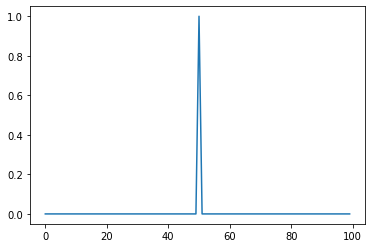

In [55]:
plt.plot(ipCount)

ipCount:  5000


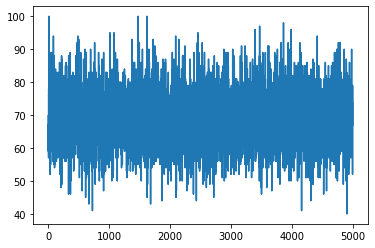

In [59]:
idealPoisson = poisson.rvs(mu=males.describe()['mean'], size=len(males))
ipCount, ipDevision = np.histogram(idealPoisson, bins=100)
print('ipCount: ', np.sum(ipCount))
plt.plot(idealPoisson)

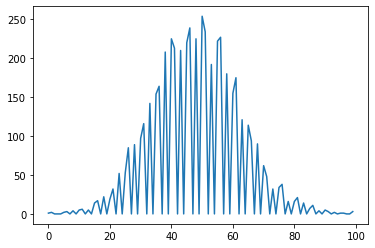

In [60]:
plt.plot(ipCount)

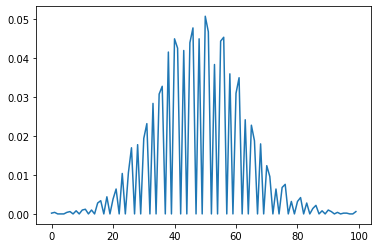

In [61]:
# برای به دست آوردن احتمال بخاطر اینکه تعداد تکرار 5000 تا در این مورد داریم بایستی فرایند زیر را انجام دهیم
ipCount = ipCount / 5000
plt.plot(ipCount)

In [62]:
kl(ipCount, count)
#در این حالت دیتای ما از توزیع پوآسون پیروی نمیکند

/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: divide by zero encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: invalid value encountered in true_divide
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: divide by zero encountered in log
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
/tmp/ipykernel_10371/1465790352.py:4: RuntimeWarning: invalid value encountered in multiply
  res = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


0.5436212726391949

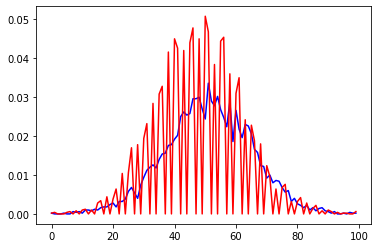

In [63]:
plt.plot(count, c='blue')
plt.plot(ipCount, c='red')